# 2024 SCOPED Workshop — Wavefield Simulations Using SPECFEM
## Notebook 3: Intro to SPECFEM3D

- SPECFEM3D_Cartesian follows very similar practices as SPECFEM2D.  
- In this short introduction, we will explore the SPECFEM3D repository, and then run a small example homogeneous halfspace example. 
- These instructions should be run from inside the Docker container, using Jupyter Lab (see instructions [here](https://github.com/adjtomo/adjdocs/blob/main/readmes/docker_image_install.md)).

-----------

**Relevant Links:** 
- Today's Notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2024-05-10_scoped_uw/3_intro_specfem3d.ipynb  
- SPECFEM3D_Cartesian User Manual: https://github.com/geodynamics/specfem3d/blob/devel/doc/USER_MANUAL/manual_SPECFEM3D_Cartesian.pdf
- SPECFEM3D_Cartesian GitHub Repository: https://github.com/geodynamics/specfem3d/tree/devel  

**Jupyter Quick Tips:**

- **Run cells** one-by-one by hitting the $\blacktriangleright$ button at the top, or by hitting `Shift + Enter`
- **Run all cells** by hitting the $\blacktriangleright\blacktriangleright$ button at the top, or by running `Run -> Run All Cells`
- **Currently running cells** that are still processing will have a `[*]` symbol next to them
- **Finished cells** will have a `[1]` symbol next to them. The number inside the brackets represents what order this cell has been run in.
- Commands that start with `!` are Bash commands (i.e., commands you would run from the terminal)
- Commands that start with `%` are Jupyter Magic commands.
- To time a task, put a `%time` before the command (e.g., `%time ! ls`)

------------
## 1) Package Exploration

Let's get started by looking at the SPECFEM3D repository.

In [1]:
# Python packages we will need for this notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
# Go to the SPECFEM3D directory
%cd /home/scoped/specfem3d

# Exploring the SPECFEM3D directory
! ls

/home/scoped/specfem3d
AUTHORS        config.sub	flags.guess  Makefile.in	  src
bin	       configure	install-sh   MESH-default	  tests
CITATION.cff   configure.ac	lib	     OUTPUT_FILES	  utils
config.guess   CONTRIBUTING.md	LICENSE      README.md		  VERSION
config.log     DATA		m4	     run_this_example.sh
config.status  EXAMPLES		Makefile     setup


Among the many folders (and files) listed above, the most notable ones are -
- `bin/`
- `DATA/`
- `OUTPUT_FILES/`
- `EXAMPLES/`
- `src/`

Let's look at these folders one by one.

### 1a) ' bin/ ' directory

In [3]:
! ls bin

xadd_model_iso
xcheck_mesh_quality
xclip_sem
xcombine_sem
xcombine_surf_data
xcombine_vol_data
xcombine_vol_data_vtk
xcombine_vol_data_vtk_bin
xcombine_vol_data_vtu
xconvert_skewness_to_angle
xconvolve_source_timefunction
xcreate_movie_shakemap_AVS_DX_GMT
xdecompose_mesh
xdecompose_mesh_mpi
xdetect_duplicates_stations_file
xgenerate_databases
xinverse_problem_for_model
xmeshfem3D
xmodel_update
xproject_and_combine_vol_data_on_regular_grid
xsmooth_sem
xspecfem3D
xsum_kernels
xsum_preconditioned_kernels


- The `bin/` folder contains binary executable files which are essentially linked compiled fortran code generated after compiling various programs available with this package  
- The most essential executables for a basic simulation are:  
    - `xmeshfem3D`: also called SPECFEM3D's internal mesher, this program discretizes the simulation domain into small elements  
    - `xgenerate_databases`: this database generation program assigns model parameter values to the elements  
    - `xspecfem3D`: also called the solver, this program uses the mesh and the corresponding model parameter values assigned to the mesh elements, for numerically solving the wave equation  
    
### 1b) ' DATA/ ' directory


In [4]:
! ls DATA

CMTSOLUTION    observation_grid_to_use_for_gravity.txt	STATIONS
FORCESOLUTION  Par_file					STATIONS_ADJOINT


The `DATA/` folder is the input files folder and contains files and folders which describe the -
- mesh: (`meshfem3D_files/`)
- model: (`meshfem3D_files/`, `tomo_files/`)
- source: (`CMTSOLUTION`, `FORCESOLUTION`)
- station: (`STATIONS`)

### 1c) ' OUTPUT_FILES/ ' directory


In [5]:
! ls OUTPUT_FILES

DATABASES_MPI


- This `OUTPUT_FILES/` folder contains the output files of any SPECFEM3D job.   
- The `DATABASES_MPI/` folder in the `OUTPUT_FILES/` folder contains the database files generated as a result of a meshing or database generation job. The database files can be very large in size.  
- Other job files like log files for the various programs as well as the output seismograms are directly generated in the `OUTPUT_FILES/` folder.

### 1d) ' src/ ' directory

In [6]:
! ls src

auxiliaries	    generate_databases	       meshfem3D  tomography
check_mesh_quality  gpu			       shared
decompose_mesh	    inverse_problem_for_model  specfem3D


- The `src/` folder contains the source code for the various programs in SPECFEM3D.  
- If you want to add to or modify some of SPECFEM3D's features, you need to modify one or more of the files in the 'src/' subfolders. 
- If you think the features you added would be useful to the broader SPECFEM3D community, please consider making a pull request to the SPECFEM3D github [repository](https://github.com/geodynamics/specfem3d/tree/devel) so that it can be reviewed and integrated to the package.  

### 1e) ' EXAMPLES/ ' directory

In [7]:
! ls EXAMPLES

notebooks
process_DATA_Par_files_to_update_their_parameters_from_a_main_file.py
README.md


- The `EXAMPLES/` folder contains a variety of examples to provide a quick start to the user on how to use SPECFEM3D and its various features. 
- The README files within the example folders within `EXAMPLES/` guide the user through the steps to run each example.  
- Some of the highly recommended examples to start with, depending on your need to run SPECFEM3D, are:
    - `homogeneous_halfspace/` - a simple homogeneous halfspace model based simulation
    - `meshfem3D_examples/socal1D/` - a layered model based simulation
    - `sensitivity_kernels_liutromp2006/` - adjoint simulations to generate the kernels in [Liu&Tromp 2006](https://pubs.geoscienceworld.org/ssa/bssa/article/96/6/2383/146674/Finite-Frequency-Kernels-Based-on-Adjoint-Methods)

>__NOTE:__ README files, with steps to run these examples, should not undermine the detailing provided in the [manual](https://github.com/geodynamics/specfem3d/blob/master/doc/USER_MANUAL) on how to run SPECFEM3D.



- Here we will start with the `homogeneous halfspace/` example, and then move on to running simulations with layered models.  
- We will also discuss some strategies to design meshes using SPECFEM3D's internal mesher.  

-----------

## 2) Setting Up Simulations

- It is often desirable to run SPECFEM outside of the cloned SPECFEM repository, in order to keep files and outputs manageable. 
- SPECFEM3D only requires the following 3 directories for a successful run -
    - `bin/` (with compiled executables)
    - `DATA/` (with the necessary input files)
    - `OUTPUT_FILES/`

In this section we will set up a separate SPECFEM3D working directory to work with.

>__NOTE:__ The following cells assume that we are in the directory `/home/scoped/work/day_1/specfem3d_workdir`, so we must evaluate the '%cd' command (if needed) to ensure that cells work as expected.

In [8]:
# Create separate working directory for SPECFEM3D
! mkdir -p /home/scoped/work/day_1/specfem3d_workdir

# Go to the SPECFEM3D working directory
%cd /home/scoped/work/day_1/specfem3d_workdir

# Symlink the binary files, and copy the relevant DATA/ directory
! ln -s /home/scoped/specfem3d/bin .
! mkdir -p OUTPUT_FILES/DATABASES_MPI

# Look at the work directory
! ls

/home/scoped/work/day_1/specfem3d_workdir
bin  OUTPUT_FILES


- The work directory now has the `bin/` and the `OUTPUT_FILES/` folders.
- The `DATA/` folder will be added in the subsequent sections depending on the example we want to run.

-----------

## 3) Homogeneous Halfspace Simulations

A SPECFEM3D simulation primarily involves three steps -
- meshing
- database generation
- solving the wave equation

We will go through these steps in the following example.

This example creates a homogeneous halfspace, i.e. a single volume block with a
constant elastic material property, using SPECFEM3D's internal mesher, and runs a
forward simulation.

In [9]:
# Copy necessary input files for the homogeneous halfspace example
! cp -r /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/DATA .
! cp -r /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/meshfem3D_files DATA/.

# Look at the DATA directory
! ls DATA

cp: cannot stat '/home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/DATA': No such file or directory
cp: cannot stat '/home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/meshfem3D_files': No such file or directory
ls: cannot access 'DATA': No such file or directory


### Step 1) Meshing

Here we generate the numerical mesh, or the discretization of our domain into finite elements

In [10]:
# Explore the mesh files
! ls DATA/meshfem3D_files

ls: cannot access 'DATA/meshfem3D_files': No such file or directory


In [11]:
# Check the Mesh_Par_file
! cat DATA/meshfem3D_files/Mesh_Par_file

cat: DATA/meshfem3D_files/Mesh_Par_file: No such file or directory


In [12]:
# Run mesher (xmeshfem3D)
! mpiexec -np 4 ./bin/xmeshfem3D

# Look at the generated mesh files
! ls OUTPUT_FILES/DATABASES_MPI


 Opening file failed, please check your file path and run-directory.
 checked first: ./DATA/Par_file
      and then: run0001/./DATA/Par_file
STOP Error opening Par_file


### Step 2) Database Generation: Model assignment to mesh

We generate database files which stores the GLL model to be used for simulations.

In [13]:
# Run database generator (xgenerate_databases)
! mpiexec -np 4 ./bin/xgenerate_databases

# Explore the generated database files
! ls OUTPUT_FILES/DATABASES_MPI


 Opening file failed, please check your file path and run-directory.
 checked first: ./DATA/Par_file
      and then: run0001/./DATA/Par_file
STOP Error opening Par_file


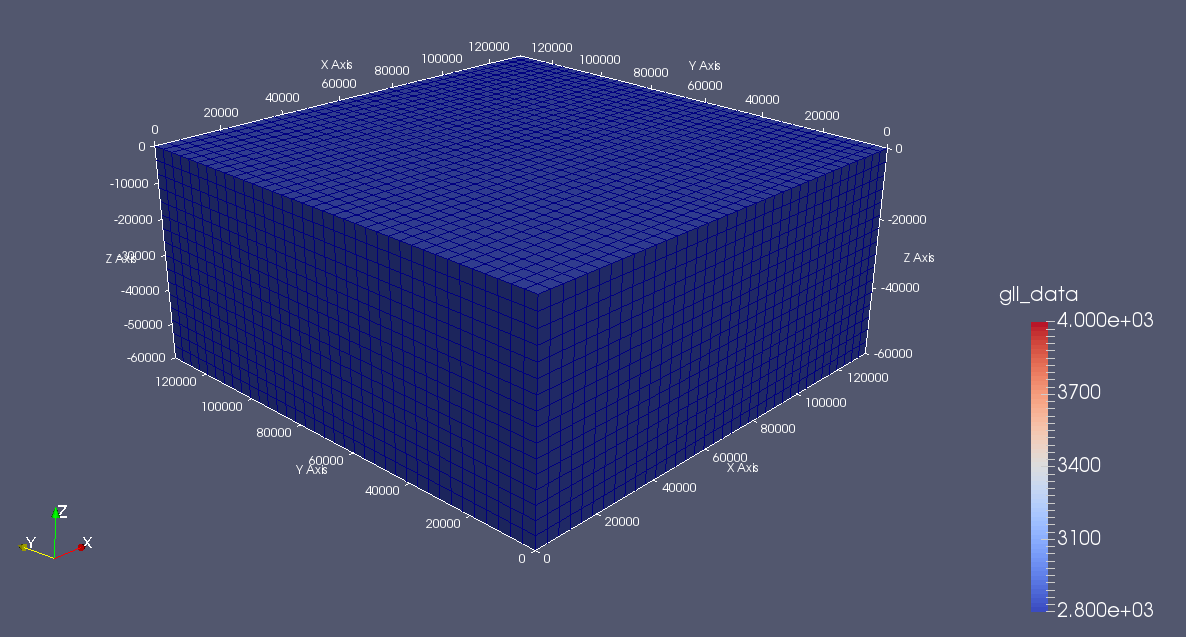

In [14]:
# View the meshing and the Vp model
# The following image was generated using Paraview
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/mesh/example_A.png .
Image("example_A.png")

**Fig.** The homogeneous halfspace velocity (Vp) model and mesh. The model spans 134 km in the 'X' and 'Y' directions, and 60 km in the 'Z' direction. The mesh has 36 elements in the 'X' and 'Y' directions, and has 16 elements in the 'Z' direction. The halfspace has a Vp value of 2.8 km/s.

#### Step 3) Simulation: Solving the wave equation

Finally, we run the numerical solver to simulation seismic wave propagation within our mesh and model

In [15]:
# Check the source definition
! cat DATA/CMTSOLUTION

cat: DATA/CMTSOLUTION: No such file or directory


Read more about the CMTSOLUTION files [here](https://www.sciencedirect.com/science/article/pii/S0031920112000696?via%3Dihub).

In [16]:
# Check the stations file
! cat DATA/STATIONS

cat: DATA/STATIONS: No such file or directory


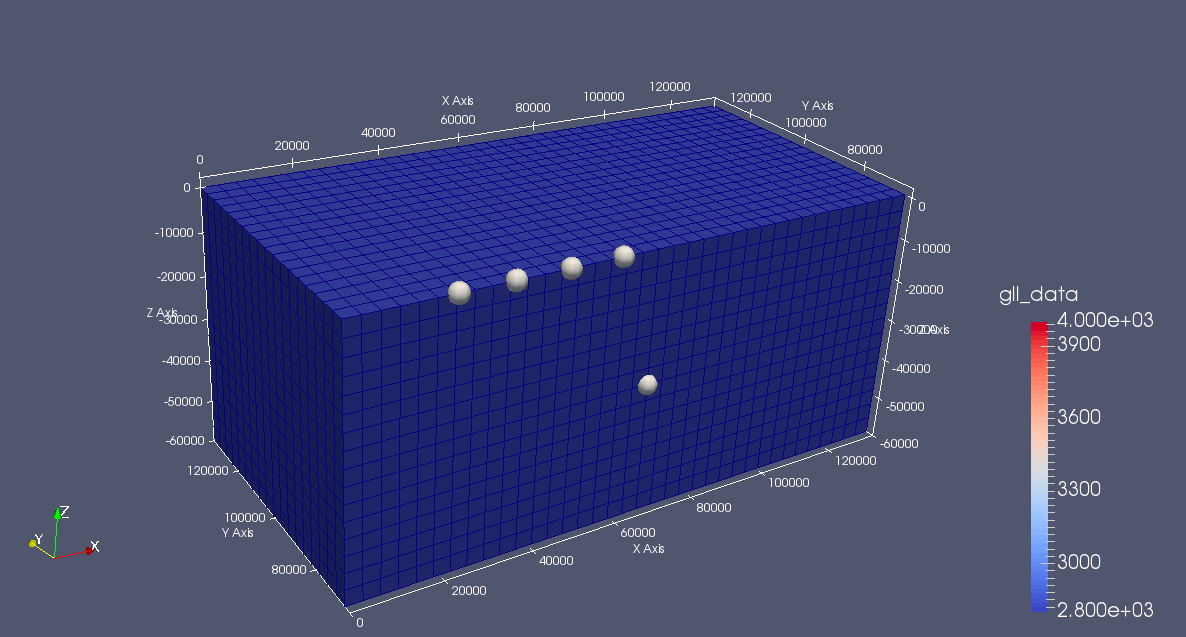

In [17]:
# View the meshing and the Vp model (figure pre-generated using ParaView)
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/source_station_geometry/sr.png .
Image("sr.png")

**Fig.** The source station geometry, in the homogeneous halfspace domain with the 'Y' dimension cut in half. The source and stations are placed on the plane of the slice. The source is at the center of the grid, while the stations are equally spaced on a section along the surface.

In [18]:
# Check the Par_file
! head -30 DATA/Par_file

head: cannot open 'DATA/Par_file' for reading: No such file or directory


In [19]:
! head -80 DATA/Par_file | tail -n 22

head: cannot open 'DATA/Par_file' for reading: No such file or directory


In [20]:
# Run the solver (xspecfem3D)
%time ! mpiexec -np 4 ./bin/xspecfem3D


 Opening file failed, please check your file path and run-directory.
 checked first: ./DATA/Par_file
      and then: run0001/./DATA/Par_file
STOP Error opening Par_file
CPU times: user 818 µs, sys: 5.42 ms, total: 6.24 ms
Wall time: 261 ms


>__NOTE:__ solver runs should take ~5 minutes or less on a recent (as of 2022) laptop.

Note the wall time for the simulation.

In [21]:
# Look at the simulation output files
! ls OUTPUT_FILES/

DATABASES_MPI


In [22]:
# Explore the seismograms
! head -25 OUTPUT_FILES/DB.X50.BXZ.semd 

head: cannot open 'OUTPUT_FILES/DB.X50.BXZ.semd' for reading: No such file or directory


In [23]:
# Plot the seismograms
X20_Z = np.genfromtxt("OUTPUT_FILES/DB.X20.BXZ.semd", dtype=None, names=("time","BXZ"))
X30_Z = np.genfromtxt("OUTPUT_FILES/DB.X30.BXZ.semd", dtype=None, names=("time","BXZ"))
X40_Z = np.genfromtxt("OUTPUT_FILES/DB.X40.BXZ.semd", dtype=None, names=("time","BXZ"))
X50_Z = np.genfromtxt("OUTPUT_FILES/DB.X50.BXZ.semd", dtype=None, names=("time","BXZ"))

t = X20_Z["time"]

plt.title("Seismograms (Z - component)")
plt.xlabel("---- time -->")
plt.ylabel("---- displacement -->")

plt.plot(t,X20_Z["BXZ"],label="X20")
plt.plot(t,X30_Z["BXZ"],label="X30")
plt.plot(t,X40_Z["BXZ"],label="X40")
plt.plot(t,X50_Z["BXZ"],label="X50")

plt.legend(title="Station")
plt.savefig("seis.png")

FileNotFoundError: OUTPUT_FILES/DB.X20.BXZ.semd not found.

In [ ]:
# We can also use the RecordSection tool to plot our synthetics
! recsec --syn_path OUTPUT_FILES --source DATA/CMTSOLUTION --stations DATA/STATIONS --components XYZ --scale_by normalize 
Image("record_section.png")

In [ ]:
# Let's remove the large sized database files to reduce storage requirements
! rm -rf /home/scoped/work/day_1/specfem3d_workdir/OUTPUT_FILES/DATABASES_MPI

**Congratulations! You have reached your destination.**